# Task 1 Analysis

## RUN SUMMARY STATISTICS FOR A DATASET (TASK 1)

In [4]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plot
sns.set_style("darkgrid")

In [5]:
# IMPORT DATA TASK 1 (HUMAN)
temp1 = pd.read_csv('../Output/Task1_step4.csv')
db = temp1
print(temp1)

       participant_ID  treatment  part  trial_no  rounds  red_prior_prob  \
0                 1.0        1.0   1.0       1.0     1.0             0.5   
1                 1.0        1.0   1.0       1.0     1.0             0.5   
2                 1.0        1.0   1.0       2.0     3.0             0.1   
3                 1.0        1.0   1.0       2.0     3.0             0.1   
4                 1.0        1.0   1.0       2.0     3.0             0.1   
...               ...        ...   ...       ...     ...             ...   
43645           291.0        0.0   1.0      25.0     7.0             0.7   
43646           291.0        0.0   1.0      25.0     7.0             0.7   
43647           291.0        0.0   1.0      25.0     7.0             0.7   
43648           291.0        0.0   1.0      25.0     7.0             0.7   
43649           291.0        0.0   1.0      25.0     7.0             0.7   

       current_rounds  action_type  suspect  count_red_samples  \
0                   1

In [6]:
temp1.head()

,participant_ID,treatment,part,trial_no,rounds,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,1.0,1.0,1.0,0.5,1,0,1.0,0,0,0,-1.0,0.500000,1.0,1.0,4654.1816
1,1.0,1.0,1.0,1.0,1.0,0.5,2,1,1.0,1,0,0,-1.0,0.428571,1.0,1.0,13857.2739
2,1.0,1.0,1.0,2.0,3.0,0.1,1,0,0.0,0,0,0,-1.0,0.100000,0.0,0.0,3317.6681
3,1.0,1.0,1.0,2.0,3.0,0.1,2,0,0.0,0,1,0,-1.0,0.129032,0.0,0.0,5101.5863
4,1.0,1.0,1.0,2.0,3.0,0.1,3,0,0.0,0,2,0,-1.0,0.164948,0.0,0.0,6735.5187


In [7]:
# CREATE VECTOR OF "final beliefs" (only when the action is "accuse")
fin = []
for key,value in temp1.iterrows():
    if value[7] == 1.0:
        fin.append(temp1['posterior'][key])

## CHECK THE FINAL BELIEFS ##

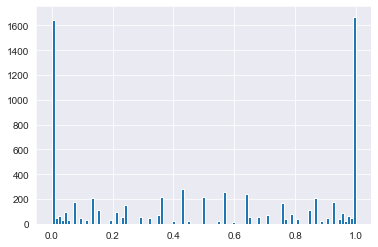

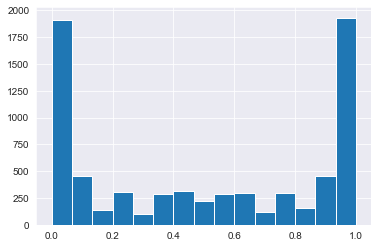

In [8]:
# PLOT FINAL BELIEFS
plt.hist(fin, bins=101)
plt.show()
plt.hist(fin, bins=15)
plt.show()

In [11]:
vector_prior   = [0.1, 0.3, 0.5, 0.7, 0.9]
vector_samples = [1, 3, 5, 7, 9]

table_condition=[];
for i_prior in vector_prior:
    for i_samples in vector_samples:
        table_condition.append([i_prior, i_samples])

n_conditions = len(table_condition)

print('List of conditions')
#print(table_condition)
table_condition

List of conditions


[[0.1, 1],
 [0.1, 3],
 [0.1, 5],
 [0.1, 7],
 [0.1, 9],
 [0.3, 1],
 [0.3, 3],
 [0.3, 5],
 [0.3, 7],
 [0.3, 9],
 [0.5, 1],
 [0.5, 3],
 [0.5, 5],
 [0.5, 7],
 [0.5, 9],
 [0.7, 1],
 [0.7, 3],
 [0.7, 5],
 [0.7, 7],
 [0.7, 9],
 [0.9, 1],
 [0.9, 3],
 [0.9, 5],
 [0.9, 7],
 [0.9, 9]]

# Create test statistics

LIST OF DESIRED VARIABLES OF INTEREST

Summary statistics (aggregate and for each condition)
1. Percentage correct answer
2. Percentage evidence found
3. Percentage confirmatory in round 1
4. Percentage confirmatory overall (defined wrt the prior)

Searching behavior
1. Percentage confirmatory search as a function of round (x-axis) and condition (lines: low/high prior, n_days)

Action behavior
1. Proability of accusing red as a function of the true posterior probability
2. Separate based on the initial prior
3. Separate based on the number of samples


In [12]:
summary_statistic = [];
confirmatory_round = [];
number_observations =[];
x_round = [];
 
for i_condition in range(25):

    i_prior   = table_condition[i_condition][0]
    i_samples = table_condition[i_condition][1]
    
    ##### SUMMARY STATISTICS
    
    # select trials based on the condition, separate accuse and investigate
    temp      = db.loc[(db['red_prior_prob']==i_prior) & (db['rounds']==i_samples)]
    t1_accuse = temp.loc[temp['action_type'] == 1]
    t1_investigate    = temp.loc[temp['action_type'] == 0]
    # separate rounds with evidence found (certain) or not found (clean)
    t1_accuse_certain    = t1_accuse.loc[t1_accuse['evidence_found'] == 1]
    t1_accuse_clean      = t1_accuse.loc[t1_accuse['evidence_found'] == 0]
    t1_investigate_round1     = t1_investigate.loc[t1_investigate['current_rounds'] == 1]
    t1_investigate_clean = t1_investigate.loc[t1_investigate['evidence_found'] == 0]

    # total number of trials
    n_trials = len(t1_accuse)

    # percentage correct
    n_correct = len(t1_accuse.loc[(t1_accuse['true_guilty_suspect'] == t1_accuse['suspect_accused'])])
    perc_correct = n_correct/n_trials

    # percentage evidence found
    n_evidence_found = len(t1_accuse_certain)
    perc_evidence_found = n_evidence_found/n_trials

    # percentage confirmatory behavior (in round 1 or all)
    n_rounds_investigate_red = len(t1_investigate_round1.loc[t1_investigate_round1['suspect'] == 0])
    if i_prior == 0.5:
        n_rounds_investigate_confirm  = n_trials/2
    if i_prior > 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_red
    if i_prior < 0.5:
        n_rounds_investigate_confirm  = n_trials-n_rounds_investigate_red    
    perc_confirm_round1 = n_rounds_investigate_confirm/n_trials

    n_rounds_investigate_clean  = len(t1_investigate_clean)
    n_rounds_investigate_red    = len(t1_investigate_clean.loc[t1_investigate_clean['suspect'] == 0])
    if i_prior == 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_clean/2
    if i_prior > 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_red
    if i_prior < 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_clean-n_rounds_investigate_red    
    perc_confirm_all = n_rounds_investigate_confirm/n_rounds_investigate_clean

    # rounding
    n_digits = 3;
    perc_correct         = round(perc_correct,n_digits)
    perc_evidence_found  = round(perc_evidence_found,n_digits)
    perc_confirm_round1  = round(perc_confirm_round1,n_digits)
    perc_confirm_all     = round(perc_confirm_all,n_digits)
    
    new_summary_statistic = [perc_correct, perc_evidence_found, perc_confirm_round1, perc_confirm_all]
    summary_statistic.append(new_summary_statistic)
    
    
    
    #### VECTOR ROUND (prob of searching confirmatory given condition and round number)
    new_confirmatory_round = [];
    new_number_observations = [];
    new_x_round = [];

    for i_round in range(i_samples):
 
        temp                 = db.loc[(db['red_prior_prob']==i_prior) & (db['rounds']==i_samples) & (db['current_rounds']==(i_round+1))]
        t1_investigate       = temp.loc[temp['action_type'] == 0]
        t1_investigate_clean = t1_investigate.loc[t1_investigate['evidence_found'] == 0]

        # percentage confirmatory behavior
        n_rounds_total = len(t1_investigate_clean)
        n_rounds_investigate_red = len(t1_investigate_clean.loc[t1_investigate_clean['suspect'] == 0])
        if i_prior == 0.5:
            n_rounds_investigate_confirm  = n_rounds_total/2
        if i_prior > 0.5:
            n_rounds_investigate_confirm  = n_rounds_investigate_red
        if i_prior < 0.5:
            n_rounds_investigate_confirm  = n_rounds_total-n_rounds_investigate_red    
        perc_confirm = round(n_rounds_investigate_confirm/n_rounds_total,n_digits)
    
        # add to the vector
        new_confirmatory_round.append(perc_confirm)
        new_number_observations.append(n_rounds_total)
        new_x_round.append(i_round+1)

    confirmatory_round.append(new_confirmatory_round)
    number_observations.append(new_number_observations)
    x_round.append(new_x_round)
    
# PRINT

print('SUMMARY STATISTIC')
print(np.matrix(summary_statistic))

print('CONFIRMATORY BEHAVIOR OVER ROUNDS')
print(np.array(confirmatory_round))
print(np.array(number_observations))

SUMMARY STATISTIC
[[0.838 0.148 0.344 0.344]
 [0.856 0.347 0.34  0.374]
 [0.869 0.495 0.326 0.401]
 [0.9   0.622 0.354 0.452]
 [0.873 0.704 0.323 0.454]
 [0.749 0.165 0.344 0.344]
 [0.797 0.34  0.351 0.378]
 [0.804 0.485 0.306 0.365]
 [0.794 0.601 0.34  0.407]
 [0.835 0.646 0.33  0.402]
 [0.543 0.162 0.5   0.5  ]
 [0.708 0.337 0.5   0.5  ]
 [0.704 0.46  0.5   0.5  ]
 [0.797 0.553 0.5   0.5  ]
 [0.804 0.649 0.5   0.5  ]
 [0.595 0.12  0.381 0.381]
 [0.732 0.351 0.347 0.39 ]
 [0.78  0.464 0.34  0.385]
 [0.79  0.495 0.337 0.377]
 [0.801 0.636 0.351 0.382]
 [0.804 0.141 0.32  0.32 ]
 [0.859 0.409 0.351 0.397]
 [0.866 0.505 0.316 0.393]
 [0.873 0.615 0.333 0.419]
 [0.907 0.653 0.316 0.423]]
CONFIRMATORY BEHAVIOR OVER ROUNDS
[list([0.344]) list([0.34, 0.379, 0.413])
 list([0.326, 0.363, 0.412, 0.481, 0.487])
 list([0.354, 0.389, 0.429, 0.46, 0.542, 0.537, 0.641])
 list([0.323, 0.376, 0.41, 0.509, 0.49, 0.515, 0.585, 0.563, 0.637])
 list([0.344]) list([0.351, 0.351, 0.447])
 list([0.306, 0.343

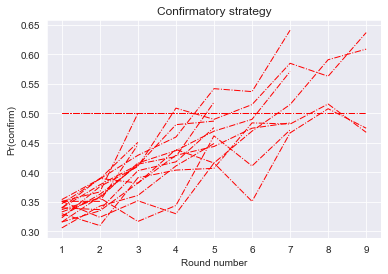

In [13]:
# PLOT THE DIFFERENCE TRENDS
plot.plot2d('Confirmatory strategy', x_round, confirmatory_round, 'Round number', 'Pr(confirm)')

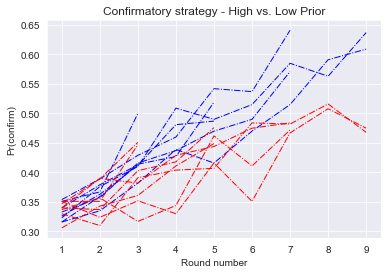

In [15]:
### SEPARATE THE TWO CONDITIONS (HIGH AND LOW PRIOR)

# DEFINE THE PLOT

# HIGH PRIOR
target_prior = 0.1
target_color = ['red']
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior) or (i_prior == (1-target_prior)):
        x_round_target.append(x_round[i_condition])
        y_round_target.append(confirmatory_round[i_condition])

x_high = x_round_target
y_high = y_round_target


# LOW PRIOR
target_prior = 0.3
target_color = ['blue']
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior) or (i_prior == (1-target_prior)):
        x_round_target.append(x_round[i_condition])
        y_round_target.append(confirmatory_round[i_condition])

x_low = x_round_target
y_low = y_round_target


target_colors = ['blue']*len(y_low) + ['red']*len(y_high)
plot.plot2d('Confirmatory strategy - High vs. Low Prior', x_high+x_low, y_high+y_low, 'Round number', 'Pr(confirm)',target_colors)

# NOTES FOR TESTING...




[0.33229999999999993, 0.365625, 0.422, 0.45883333333333337, 0.48733333333333334, 0.503, 0.578, 0.577, 0.623]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.3427, 0.350125, 0.388, 0.3893333333333333, 0.4423333333333333, 0.43024999999999997, 0.47625, 0.512, 0.47150000000000003]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


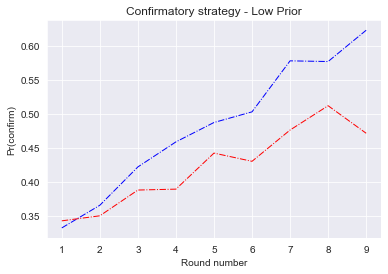

In [16]:
# CALCULATE AND PLOT THE AVERAGES FOR THE DIFFERENT CONDITIONS

target_color = 'blue'
x_round_target = x_high
y_round_target = y_high

val_high = []
x_high = []
for i_period in range(9):
    period = []
    for i_file in range(len(x_round_target)):
        if len(x_round_target[i_file])>i_period:
            period.append(y_round_target[i_file][i_period])
    
    mean_period = sum(period)/len(period)
    val_high.append(mean_period)
    x_high.append(i_period+1)

print(val_high)
print(x_high)
#plot.plot2d('Confirmatory strategy - High Prior', [x_high], [val_high] , 'Round number', 'Pr(confirm)')


target_color = ['blue','red']
x_round_target = x_low
y_round_target = y_low

val_low = []
x_low = []
for i_period in range(9):
    period = []
    for i_file in range(len(x_round_target)):
        if len(x_round_target[i_file])>i_period:
            period.append(y_round_target[i_file][i_period])
    
    mean_period = sum(period)/len(period)
    val_low.append(mean_period)
    x_low.append(i_period+1)

print(val_low)
print(x_low)


plot.plot2d('Confirmatory strategy - Low Prior', [x_high,x_low] , [val_high,val_low] , 'Round number', 'Pr(confirm)', target_color)


In [17]:
# NOTES FOR TESTING...


t1_accuse_clean


t1_accuse_clean['posterior'].round(4)
list_unique = t1_accuse_clean['posterior'].unique()
list_unique = np.sort(list_unique)
list_unique = list_unique.tolist()
list_unique

t1_accuse_clean

df_posterior_average = t1_accuse_clean.groupby(['posterior'])['suspect'].mean()
df_posterior_average

posterior
0.403257    0.368421
0.545734    1.000000
0.681096    0.500000
0.791531    0.500000
0.791531    0.600000
0.870968    1.000000
0.870968    0.857143
0.923077    1.000000
0.923077    0.800000
0.955224    1.000000
0.974310    1.000000
0.974310    1.000000
0.985385    1.000000
0.991726    0.911111
Name: suspect, dtype: float64

# ACCUSE BEHAVIOR ###
#### STORE the relevant information for every condition

In [22]:
accuse_statistic = [];
 
for i_condition in range(25):

    i_prior   = table_condition[i_condition][0]
    i_samples = table_condition[i_condition][1]
    
    ##### SUMMARY STATISTICS
    
    # select trials based on the condition, separate accuse and investigate
    temp      = db.loc[(db['red_prior_prob']==i_prior) & (db['rounds']==i_samples)]
    t1_accuse = temp.loc[temp['action_type'] == 1]
    t1_investigate    = temp.loc[temp['action_type'] == 0]
    # separate rounds with evidence found (certain) or not found (clean)
    t1_accuse_certain    = t1_accuse.loc[t1_accuse['evidence_found'] == 1]
    t1_accuse_clean      = t1_accuse.loc[t1_accuse['evidence_found'] == 0]
    t1_investigate_round1     = t1_investigate.loc[t1_investigate['current_rounds'] == 1]
    t1_investigate_clean = t1_investigate.loc[t1_investigate['evidence_found'] == 0]

    
    
    ########## FOCUS ONLY on t1_accuse_clean
    # calculate the prob(accuse 1) as a function of the posterior
    # vector of x (posteriors), vector of y (prob_accuse)
    t1_accuse_clean['posterior'] = t1_accuse_clean['posterior'].round(3)    
    list_unique = t1_accuse_clean['posterior'].unique()
    list_unique = np.sort(list_unique)
    list_unique = list_unique.tolist()
    list_unique

    df_posterior_average = t1_accuse_clean.groupby(['posterior'])['suspect'].mean().reset_index()
    accuse_statistic.append(df_posterior_average)    

accuse_statistic

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[   posterior   suspect
 0      0.077  0.050000
 1      0.129  0.101351,    posterior   suspect
 0      0.045  0.030303
 1      0.077  0.047619
 2      0.129  0.206897
 3      0.208  0.256757,    posterior   suspect
 0      0.026  0.078431
 1      0.045  0.142857
 2      0.077  0.076923
 3      0.129  0.000000
 4      0.208  0.214286
 5      0.319  0.315789,    posterior   suspect
 0      0.015  0.062500
 1      0.026  0.333333
 2      0.045  0.333333
 3      0.077  0.083333
 4      0.129  0.000000
 5      0.208  0.000000
 6      0.319  0.166667
 7      0.454  0.444444,    posterior   suspect
 0      0.008  0.054054
 1      0.015  0.000000
 2      0.026  0.000000
 3      0.045  0.222222
 4      0.077  0.333333
 5      0.129  0.250000
 6      0.208  0.250000
 7      0.454  0.666667
 8      0.597  0.500000,    posterior   suspect
 0      0.243  0.053191
 1      0.364  0.154362,    posterior   suspect
 0      0.153  0.066667
 1      0.243  0.130435
 2      0.364  0.115385
 3      0.504  0

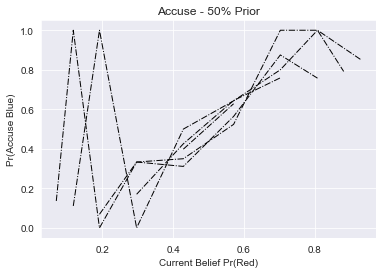

In [21]:
# HIGH PRIOR
target_prior = 0.5
target_color = 'k'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target.append(x_new)
        y_round_target.append(y_new)

plot.plot2d('Accuse - 50% Prior', x_round_target, y_round_target, 'Current Belief Pr(Red)', 'Pr(Accuse Blue)',target_color)


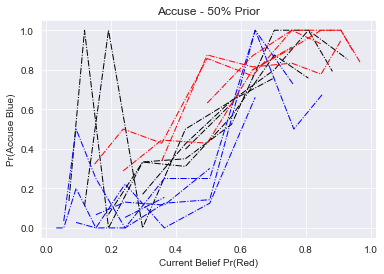

In [20]:
# NULL PRIOR
target_prior = 0.5
y_round_target1 = []
x_round_target1= []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target1.append(x_new)
        y_round_target1.append(y_new)

# HIGH PRIOR
target_prior = 0.3
y_round_target2 = []
x_round_target2 = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target2.append(x_new)
        y_round_target2.append(y_new)


# HIGH PRIOR
target_prior = 0.7
y_round_target3 = []
x_round_target3 = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target3.append(x_new)
        y_round_target3.append(y_new)

target_color = ['k']*len(x_round_target1)+ ['b']*len(x_round_target2) +['r']*len(x_round_target3)

plot.plot2d('Accuse - 50% Prior', x_round_target1+x_round_target2+x_round_target3, y_round_target1+y_round_target2+y_round_target3, 'Current Belief Pr(Red)', 'Pr(Accuse Blue)',target_color)
